In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [5]:
whitewines=pd.read_csv("C:/Users/ACER/OneDrive/Jupyter Files/Machine-Learning-with-R-datasets/whitewines.csv")
whitewines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [21]:
whitewines_keys = whitewines.keys().drop('quality')

In [29]:
ct = make_column_transformer(
    (MinMaxScaler(),whitewines_keys)
)

X = whitewines.drop(columns='quality')
y = whitewines['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, X_test_normal.shape

((4163, 11), (735, 11))

In [84]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.(learning_rate=0.01),
             metrics=['mae'])

history = model.fit(X_train_normal, y_train, epochs=200, verbose=1,callbacks=[callback])

SyntaxError: invalid syntax (910581717.py, line 12)

In [79]:
model.evaluate(X_test_normal, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 0.5637 - mae: 0.5637


[0.563683271408081, 0.563683271408081]

Text(0.5, 0, 'epochs')

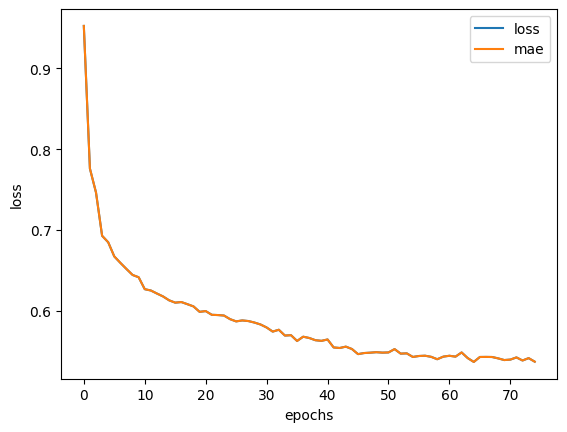

In [80]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [81]:
y_pred = model.predict(X_test_normal)
tf.squeeze(y_pred) - y_test

23/23 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(735,), dtype=float32, numpy=
array([-9.38374043e-01, -1.32661152e+00, -1.82875729e+00,  7.94243813e-02,
       -6.55975342e-01,  1.30063057e-01,  7.04088211e-02,  1.07040882e+00,
        8.85753632e-02,  7.04088211e-02, -7.57393360e-01,  7.04088211e-02,
       -7.71797657e-01, -9.29591179e-01,  1.25205898e+00,  7.04088211e-02,
       -1.08009529e+00,  1.04014921e+00, -9.29254532e-01, -9.29591179e-01,
       -6.21815681e-01, -9.21844006e-01,  7.04088211e-02,  1.18500328e+00,
       -1.94355679e+00,  7.04088211e-02,  7.04088211e-02,  3.40270042e-01,
       -1.02552938e+00,  7.04088211e-02,  7.04088211e-02,  8.76460075e-01,
       -5.86525917e-01, -9.29591179e-01,  7.04088211e-02, -4.15777206e-01,
       -6.96579933e-01, -9.29591179e-01,  7.04088211e-02,  9.42707062e-04,
       -2.47721672e-01, -9.29591179e-01, -9.92517948e-01, -7.24058151e-02,
        1.07040882e+00,  4.06618118e-02, -9.29591179e-01, -9.29591179e-01,
        8.01608086e-01,  7.04088211e-02,  7.04088211

In [82]:
y_test

4656    7
3659    8
907     8
4352    5
3271    7
       ..
2550    5
3631    6
2515    7
1419    7
19      5
Name: quality, Length: 735, dtype: int64

In [83]:
y_pred[3]

array([5.0794244], dtype=float32)